## Stochastic Gradient Descent

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits as mplot3d
%matplotlib inline

In [26]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, x, y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        mse = np.zeros((30, 30))
        count1 = 0
        self.y = y.numpy()
        self.x = x.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                mse[count1, count2] = np.mean((self.y - w2 * self.x - b2) ** 2) # MSE
                count2 += 1
            count1 += 1
        self.mse = mse
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.mse, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Cost')
            plt.xlabel('Weight')
            plt.ylabel('Bias')
            plt.show()
            
            plt.figure()
            plt.title('Cost')
            plt.xlabel('Weight')
            plt.ylabel('Bias')
            plt.contour(self.w, self.b, self.mse)
            plt.show()
            
    def set_para_loss(self, w, b, loss):
        self.n += 1
        self.W.append(w)
        self.B.append(b)
        self.LOSS.append(loss)
        
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.mse)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.mse)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('Weight')
        plt.ylabel('Bias')
        plt.show()
        
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label='Training points')
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label='Estimated Line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.legend()
        plt.title('Line estimation after Epoch ' + str(self.n))
        
        plt.subplot(122)
        plt.contour(self.w, self.b, self.mse)
        plt.scatter(self.W, self.B, marker='x', c='r')
        plt.title('Cost after Epoch ' + str(self.n))
        plt.xlabel('Weight')
        plt.ylabel('Bias')
        plt.show()

In [4]:
torch.manual_seed(1)

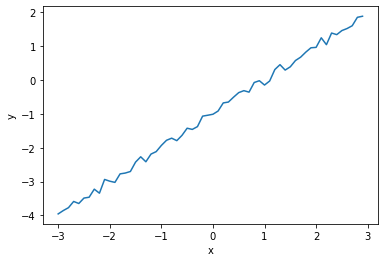

In [27]:
# Setup the actual data and simulated data
x = torch.arange(-3, 3, 0.1).view(-1, 1)
y = 1 * x - 1 + 0.1 * torch.randn(x.size())

plt.plot(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
def forward(x):
    return w * x + b

In [29]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [47]:
get_surface = plot_error_surfaces(15, 13, x, y, go = False)

In [48]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
learning_rate = 0.1
LOSS_BGD = []

def train_model(iter, loss_arr):
    for epoch in range(iter):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        
        loss_arr.append(loss)
        loss.backward()
        w.data = w.data - learning_rate * w.grad.data
        b.data = b.data - learning_rate * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()

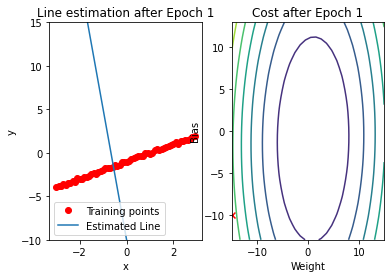

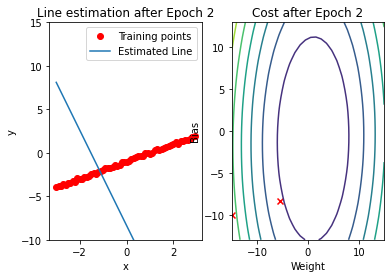

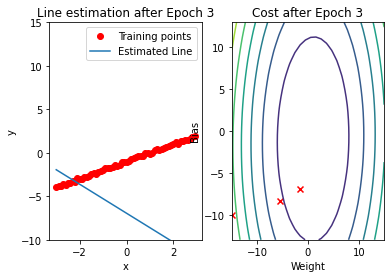

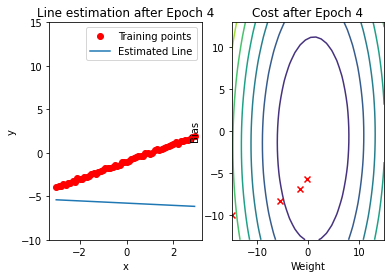

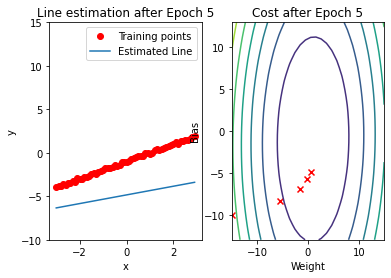

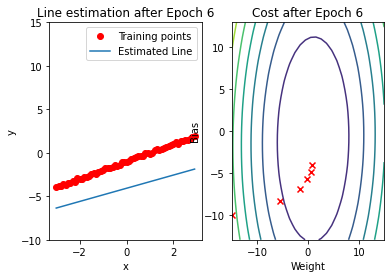

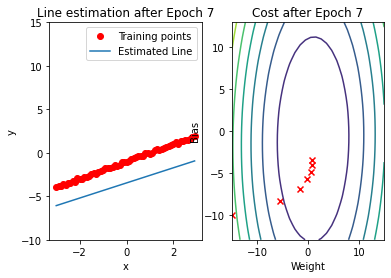

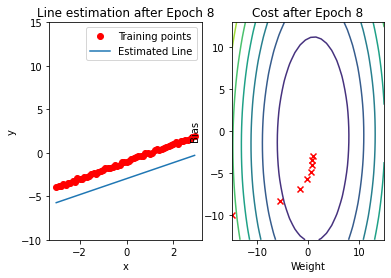

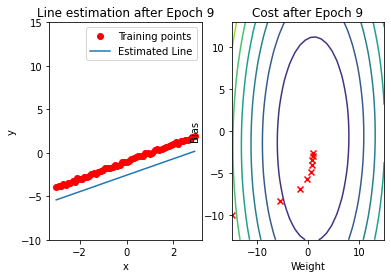

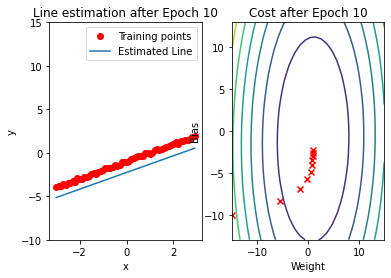

In [49]:
train_model(10, LOSS_BGD)

In [75]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
get_surface = plot_error_surfaces(15, 13, x, y, go = False)
learning_rate = 0.1
LOSS_SGD = []

def train_model_SGD(iter, loss_arr):
    for epoch in range(iter):
        y_hat = forward(x)
        loss_arr.append(criterion(y_hat, y).tolist())
        for x_, y_ in zip(x, y):
            y_hat_ = forward(x_)
            loss = criterion(y_hat_, y_)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            loss.backward()
            w.data = w.data - learning_rate * w.grad.data
            b.data = b.data - learning_rate * b.grad.data

            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

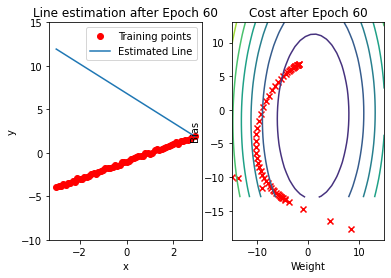

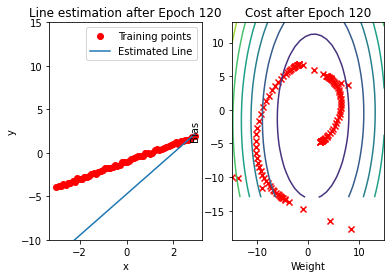

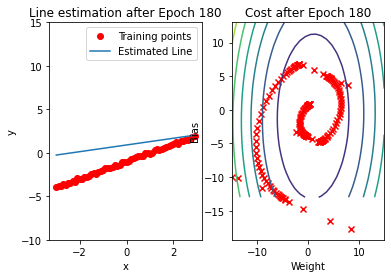

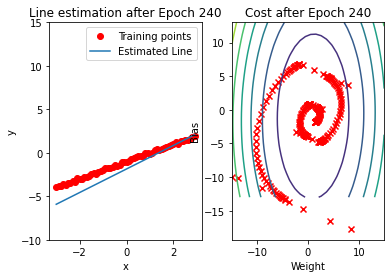

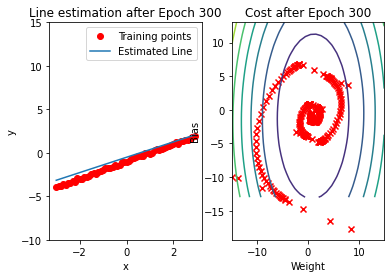

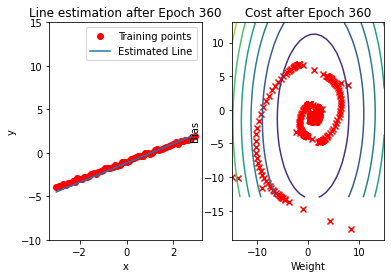

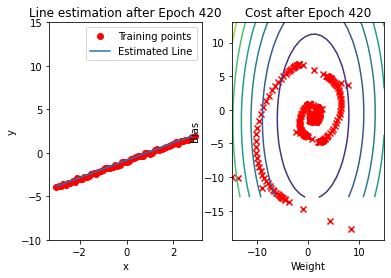

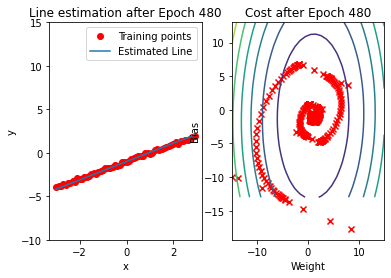

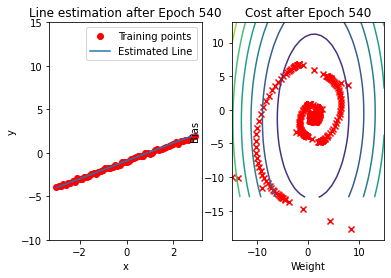

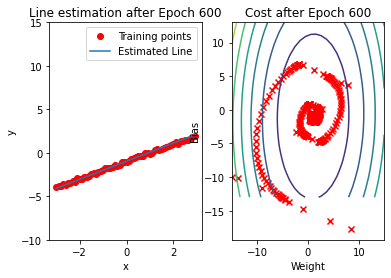

In [76]:
train_model_SGD(10, LOSS_SGD)

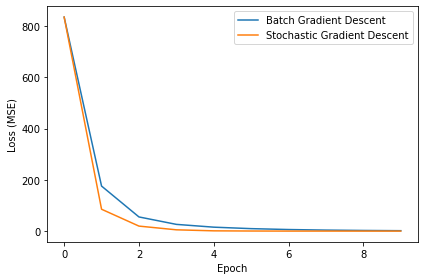

In [77]:
# Plot out the LOSS_BGD and LOSS_SGD
plt.plot(LOSS_BGD, label='Batch Gradient Descent')
plt.plot(LOSS_SGD, label='Stochastic Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
from torch.utils.data import Dataset, DataLoader

In [80]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [81]:
# Create the dataset and check the length
ds = Data()
print(len(ds))

60


In [83]:
# Print the first point
print('x:', ds[0][0], 'y:', ds[0][1])

x: tensor([-3.]) y: tensor([-4.])


In [84]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 13, x, y, go = False)

In [86]:
trainloader = DataLoader(dataset=ds, batch_size=1)

In [87]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs, loss_arr):
    for epoch in range(epochs):
        y_hat = forward(x)
        loss_arr.append(criterion(y_hat, y).tolist())
        for x_, y_ in trainloader:
            y_hat_ = forward(x_)
            loss = criterion(y_hat_, y_)
            
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            loss.backward()
            w.data = w.data - learning_rate * w.grad.data
            b.data = b.data - learning_rate * b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        get_surface.plot_ps()

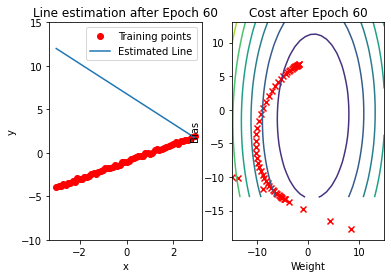

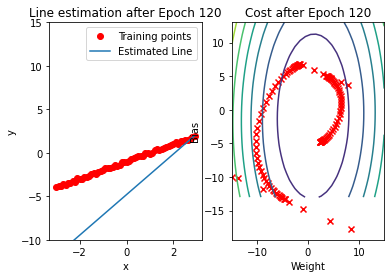

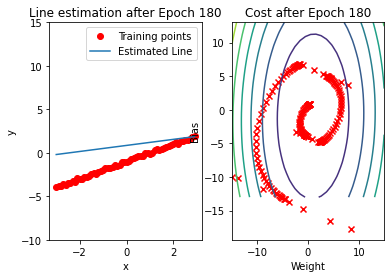

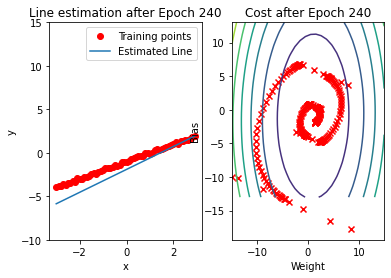

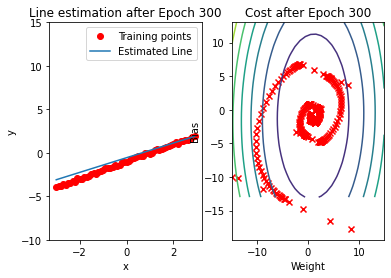

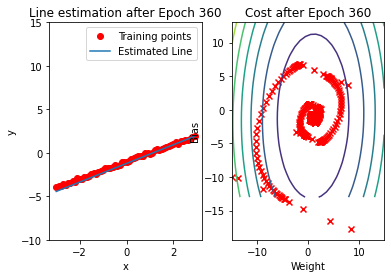

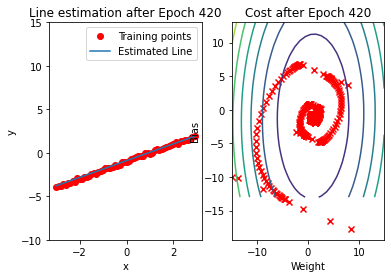

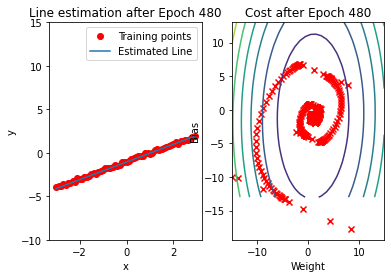

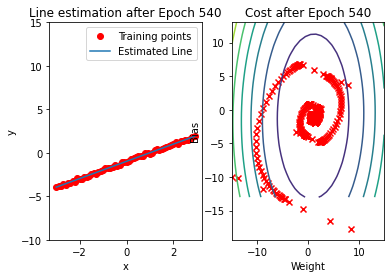

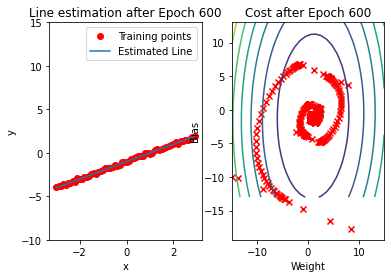

In [88]:
train_model_DataLoader(10, LOSS_Loader)

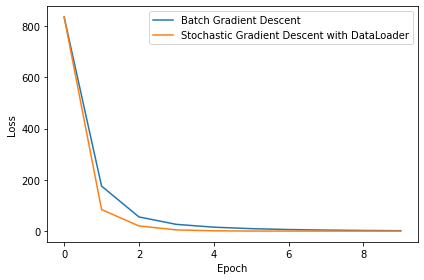

In [89]:
plt.plot(LOSS_BGD, label='Batch Gradient Descent')
plt.plot(LOSS_Loader, label='Stochastic Gradient Descent with DataLoader')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [90]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS
LOSS = []
w = torch.tensor(-12.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

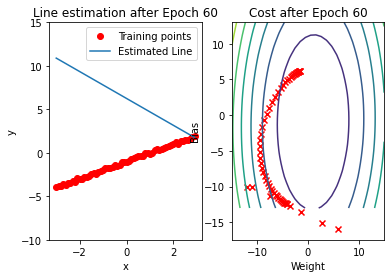

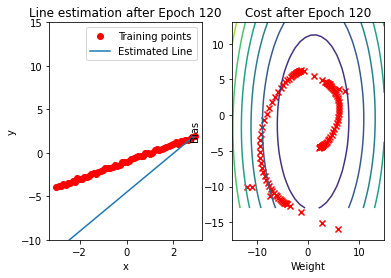

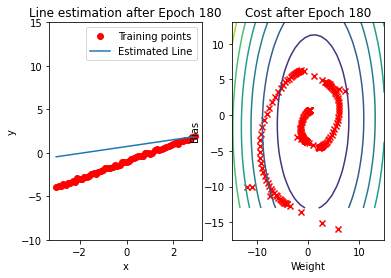

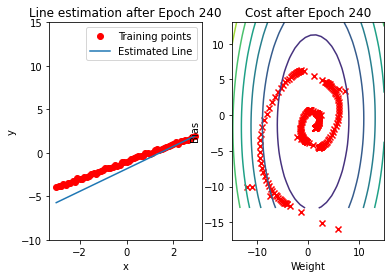

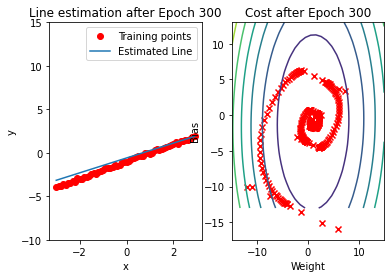

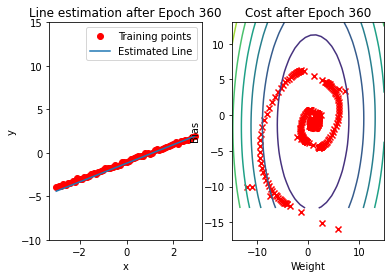

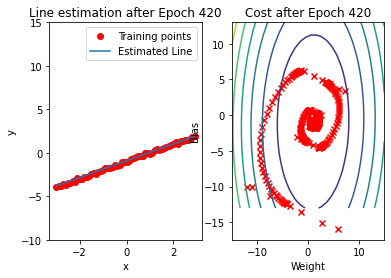

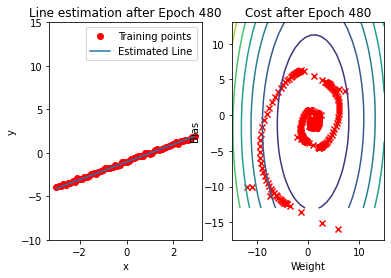

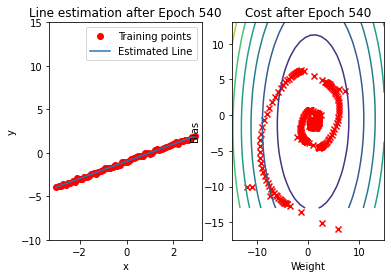

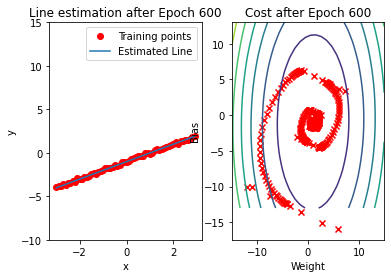

In [91]:
get_surface = plot_error_surfaces(15, 13, x, y, go = False)
train_model_DataLoader(10, LOSS)

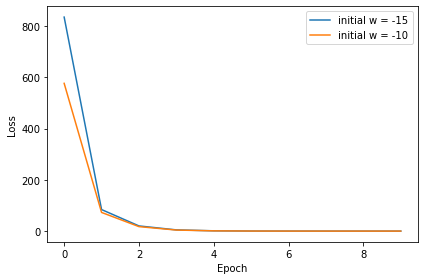

In [92]:
plt.plot(LOSS_Loader, label='initial w = -15')
plt.plot(LOSS, label='initial w = -10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()